In [80]:
import pandas as pd;
import numpy as np;
import json;
import matplotlib.pyplot as plt;
%matplotlib inline

In [81]:
rawJSON = json.loads("".join(open('keystrokes-34c38-export (7).json').readlines()))

In [82]:
def calculatePerKeyDwellTime(dataframe,DEBUG=False):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        if(DEBUG):
            print (i);
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            if(DEBUG):
                print ("running average: "+str(running_average));
            running_average/=len(subset);
            if(DEBUG):
                print ("running average/subset_len = "+str(running_average));
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
        if(DEBUG):
            print (" ");
    return dwell_times;    


def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
    first_press = index_of_presses[0];
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
        del index_of_releases[0]
        del index_of_presses[0]
    return flight_times;

In [83]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [84]:
# Just the new records
lorem_ipsum = keystrokes.iloc[22:]

In [85]:
lorem_ipsum

,keystrokes,subject
-KXcfQLt3sL8sFQLSA25,"[[""1480298596527 Shift PRESSED"",""1480298597351...",An Dee
-KXchppS19K4bkiMZIho,"[[""1480299235028 Shift PRESSED"",""1480299235217...",Joseph Haaga


In [86]:
left_DwellTimes = [];
right_DwellTimes=[];
space_DwellTimes=[];
left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];
# for n in calculatePerKeyDwellTime(split):
#     if(calculatePerKeyDwellTime(split)[n] != 0 ):
#         if n.lower() in left_hand_keys:
#             left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#         elif n.lower() == 'spacebar':
#             space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#         else:
#             right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);

In [87]:
right_DwellTimes
space_DwellTimes

[]

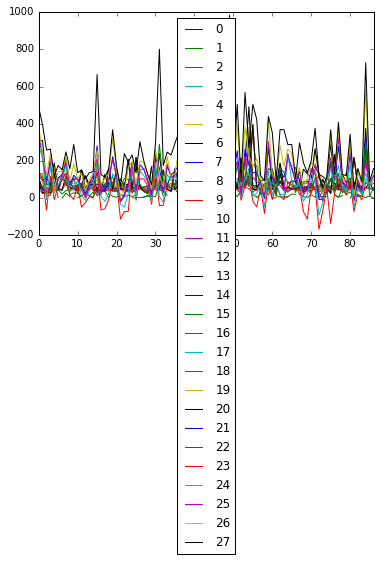

In [88]:
#  .o88o. 8888o. 8888o. 88  88 
#  88  88 88  88 88  88 88  88 
#  888888 88  88 88  88 'Y8888 
#  88  88 88  88 88  88     88 
#  88  88 88  88 8888Y' 8888Y' 

left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),16)]

descriptive_stats = [];
for n in split_keystrokes:
    left_DwellTimes = [];
    right_DwellTimes=[];
    space_DwellTimes=[];
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    
    for n in calculatePerKeyDwellTime(split):
        if(calculatePerKeyDwellTime(split)[n] != 0 ):
            if n.lower() in left_hand_keys:
                left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            elif n.lower() == 'spacebar':
                space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            else:
                right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#     results = list(pd.Series(list(calculatePerKeyDwellTime(split).values())).describe())[1:];
    results = list(pd.Series(list(left_DwellTimes)).describe())[1:];
#     results+=((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    results += list(pd.Series(list(right_DwellTimes)).describe())[1:];
    results += list(pd.Series(list(space_DwellTimes)).describe())[1:];
    results += ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    descriptive_stats.append(results);
    
andy = pd.DataFrame(descriptive_stats);
andy['subject'] = 'Andy';

andy.plot()

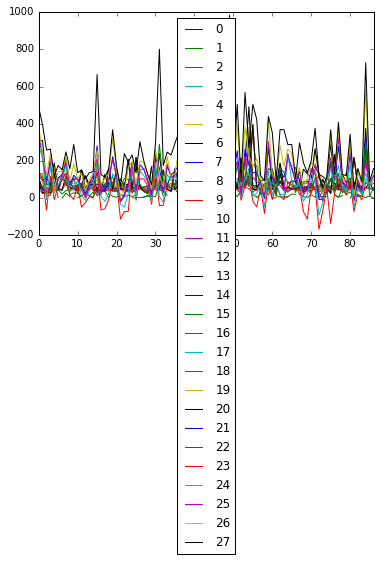

In [89]:
#      88 .o88o. 888888 
#      88 88  88 88     
#      88 88  88 8888   
#  88  88 88  88 88     
#  'Y88Y' 'Y88Y' 888888 

left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v'];

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),16)]

descriptive_stats = [];
for n in split_keystrokes:
#     print (' ');
    left_DwellTimes = [];
    right_DwellTimes=[];
    space_DwellTimes=[];
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    
    for n in calculatePerKeyDwellTime(split):
        if(calculatePerKeyDwellTime(split)[n] != 0 ):
            if n.lower() in left_hand_keys:
                left_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            elif n.lower() == 'spacebar':
                space_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
            else:
                right_DwellTimes.append(calculatePerKeyDwellTime(split)[n]);
#     results = list(pd.Series(list(calculatePerKeyDwellTime(split).values())).describe())[1:];
    results = list(pd.Series(list(left_DwellTimes)).describe())[1:];
#     print (list(pd.Series(list(left_DwellTimes)).describe())[1:])
#     results+=((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    results += list(pd.Series(list(right_DwellTimes)).describe())[1:];
#     print ()
#     print (list(pd.Series(list(right_DwellTimes)).describe())[1:])
    results += list(pd.Series(list(space_DwellTimes)).describe())[1:];
#     print ()
#     print (list(pd.Series(list(space_DwellTimes)).describe())[1:])
    results += ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
#     print ()
#     print ((list(pd.Series(calculateFlightTime(split)).describe())[1:]))
    descriptive_stats.append(results);
#     print (len(descriptive_stats))
    
joe = pd.DataFrame(descriptive_stats);
joe['subject'] = 'Joe';

joe.plot()

In [90]:
sample_descriptive_stats = pd.Series(list(calculatePerKeyDwellTime(split).values())).describe()
sample_descriptive_stats['max']-sample_descriptive_stats['50%']

0.75

In [91]:
# combine Joe & Andy
master = joe.append(andy);
master = master.reset_index();
answers = master['subject'];
X = master.drop('subject',axis=1);
# X

In [92]:
ft_labels = ["flightTime "+n for n in list(pd.Series([1,2,3,4]).describe()[1:].keys())]
dt_labels = ["dwellTime "+n for n in list(pd.Series([1,2,3,4]).describe()[1:].keys())]


In [93]:
labels = dt_labels + ft_labels

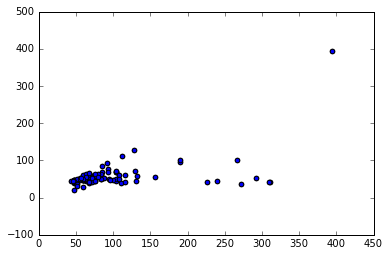

In [94]:
feature1 = 13

feature2 = 10
plt.scatter(joe[feature1], joe[feature2], c='red')
plt.scatter(andy[feature1], andy[feature2],c='blue')

In [95]:
joe

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,subject
0,79.500000,11.313708,71.500000,75.500000,79.500000,83.500000,87.500000,113.583333,132.137239,39.000000,...,104.000000,104.000000,333.833333,117.174087,144.0,289.50,349.0,389.00,489.0,Joe
1,26.333333,NaN,26.333333,26.333333,26.333333,26.333333,26.333333,114.416667,130.589369,40.000000,...,51.000000,51.000000,233.833333,92.726300,104.0,212.25,228.5,238.75,393.0,Joe
2,40.000000,NaN,40.000000,40.000000,40.000000,40.000000,40.000000,54.100000,14.630448,44.000000,...,26.666667,26.666667,77.833333,118.129449,-64.0,-8.00,84.0,128.00,259.0,Joe
3,27.500000,NaN,27.500000,27.500000,27.500000,27.500000,27.500000,50.875000,15.611828,35.500000,...,52.000000,52.000000,202.833333,54.788381,120.0,172.00,212.0,240.75,264.0,Joe
4,64.000000,5.656854,60.000000,62.000000,64.000000,66.000000,68.000000,126.625000,89.272231,63.500000,...,127.750000,127.750000,38.571429,39.174214,-7.0,28.50,33.0,33.00,121.0,Joe
5,51.500000,NaN,51.500000,51.500000,51.500000,51.500000,51.500000,43.958333,4.385107,40.000000,...,44.000000,44.000000,109.666667,47.166372,65.0,72.25,96.0,144.50,176.0,Joe
6,44.000000,0.000000,44.000000,44.000000,44.000000,44.000000,44.000000,112.000000,NaN,112.000000,...,118.000000,118.000000,126.833333,22.595722,97.0,112.00,128.0,144.00,152.0,Joe
7,99.000000,26.870058,80.000000,89.500000,99.000000,108.500000,118.000000,131.200000,83.721443,72.000000,...,NaN,NaN,198.833333,40.538459,136.0,178.00,208.0,220.00,249.0,Joe
8,45.500000,8.485281,39.500000,42.500000,45.500000,48.500000,51.500000,73.944444,19.443889,51.500000,...,53.500000,53.500000,71.857143,49.532577,17.0,35.00,72.0,93.00,158.0,Joe
9,56.000000,NaN,56.000000,56.000000,56.000000,56.000000,56.000000,64.875000,28.479159,43.500000,...,56.500000,56.500000,123.000000,108.883424,-7.0,54.75,103.5,183.75,289.0,Joe


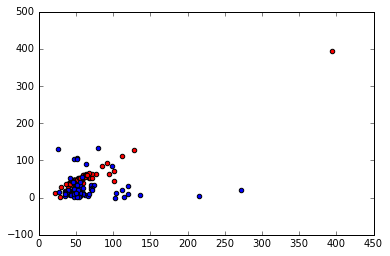

In [96]:

plt.scatter(joe[10], joe[9], c='red')
plt.scatter(andy[4], andy[8],c='blue')

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, answers, test_size=0.33, random_state=42)

In [98]:
master.iloc[47]

index           47
0          59.6667
1          28.2857
2             39.5
3             43.5
4             47.5
5            69.75
6               92
7          62.8333
8          19.1855
9               48
10              52
11              56
12           70.25
13            84.5
14         45.3333
15             NaN
16         45.3333
17         45.3333
18         45.3333
19         45.3333
20         45.3333
21           102.6
22         55.5905
23               8
24             105
25             119
26             129
27             152
subject        Joe
Name: 47, dtype: object

In [99]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
list(clf.feature_importances_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVC
clf1 = SVC(C=1.0, verbose=True, probability=True, decision_function_shape='ovr', kernel='linear')
clf1.fit(X_train, y_train) 
# clf1.predict_proba(X_test)
clf1.score(X_test,y_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
clf.score(X_test,y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
GaussianNB(priors=None)
clf.score(X_test,y_test)

# clf.get_params()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, )
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.8, max_depth=5, random_state=0).fit(X_train, y_train)
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.8, max_depth=5, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test) 

In [ ]:
# separate Dwell Time & Flight Time metrics for left hand and right hand
left_hand_keys = ['q','w','e','r','g','a','s','d','f','g','z','x','c','v']

In [ ]:
labels = ['index'] + labels + ['subject']

In [ ]:
labels

In [ ]:
master.columns=labels

In [ ]:
for n in master:
#     print (n+" "+master[n].value_counts())
    print (n+": "+str(len(master[n].value_counts())))

In [ ]:
len(master)

In [ ]:
master['dwellTime 50%'].value_counts()